## Day 34 Lecture 2 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset of house information in Ames, Iowa, predicting sale price.

In [114]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [115]:
house = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/houseprices.csv')
print(house.shape)
house.head()

(1460, 81)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

Check for nulls. Remove any columns with more than 100 nulls, then drop any remaining rows with nulls after that.

In [117]:
# your work here
dict(house.isnull().sum())

#easy way with sorting
#house.isnull().sum().sort_values(ascending=False).head(7)


{'alley': 1369,
 'bedroomabvgr': 0,
 'bldgtype': 0,
 'bsmtcond': 37,
 'bsmtexposure': 38,
 'bsmtfinsf1': 0,
 'bsmtfinsf2': 0,
 'bsmtfintype1': 37,
 'bsmtfintype2': 38,
 'bsmtfullbath': 0,
 'bsmthalfbath': 0,
 'bsmtqual': 37,
 'bsmtunfsf': 0,
 'centralair': 0,
 'condition1': 0,
 'condition2': 0,
 'electrical': 1,
 'enclosedporch': 0,
 'extercond': 0,
 'exterior1st': 0,
 'exterior2nd': 0,
 'exterqual': 0,
 'fence': 1179,
 'fireplacequ': 690,
 'fireplaces': 0,
 'firstflrsf': 0,
 'foundation': 0,
 'fullbath': 0,
 'functional': 0,
 'garagearea': 0,
 'garagecars': 0,
 'garagecond': 81,
 'garagefinish': 81,
 'garagequal': 81,
 'garagetype': 81,
 'garageyrblt': 81,
 'grlivarea': 0,
 'halfbath': 0,
 'heating': 0,
 'heatingqc': 0,
 'housestyle': 0,
 'id': 0,
 'kitchenabvgr': 0,
 'kitchenqual': 0,
 'landcontour': 0,
 'landslope': 0,
 'lotarea': 0,
 'lotconfig': 0,
 'lotfrontage': 259,
 'lotshape': 0,
 'lowqualfinsf': 0,
 'masvnrarea': 8,
 'masvnrtype': 8,
 'miscfeature': 1406,
 'miscval': 0,
 'mo

In [118]:
house.drop(columns=['alley','fence','fireplacequ','lotfrontage','miscfeature','poolqc'], inplace=True)
house.dropna(inplace=True)


In [119]:
dict(house.isnull().sum()*100/house.isnull().count())


{'bedroomabvgr': 0.0,
 'bldgtype': 0.0,
 'bsmtcond': 0.0,
 'bsmtexposure': 0.0,
 'bsmtfinsf1': 0.0,
 'bsmtfinsf2': 0.0,
 'bsmtfintype1': 0.0,
 'bsmtfintype2': 0.0,
 'bsmtfullbath': 0.0,
 'bsmthalfbath': 0.0,
 'bsmtqual': 0.0,
 'bsmtunfsf': 0.0,
 'centralair': 0.0,
 'condition1': 0.0,
 'condition2': 0.0,
 'electrical': 0.0,
 'enclosedporch': 0.0,
 'extercond': 0.0,
 'exterior1st': 0.0,
 'exterior2nd': 0.0,
 'exterqual': 0.0,
 'fireplaces': 0.0,
 'firstflrsf': 0.0,
 'foundation': 0.0,
 'fullbath': 0.0,
 'functional': 0.0,
 'garagearea': 0.0,
 'garagecars': 0.0,
 'garagecond': 0.0,
 'garagefinish': 0.0,
 'garagequal': 0.0,
 'garagetype': 0.0,
 'garageyrblt': 0.0,
 'grlivarea': 0.0,
 'halfbath': 0.0,
 'heating': 0.0,
 'heatingqc': 0.0,
 'housestyle': 0.0,
 'id': 0.0,
 'kitchenabvgr': 0.0,
 'kitchenqual': 0.0,
 'landcontour': 0.0,
 'landslope': 0.0,
 'lotarea': 0.0,
 'lotconfig': 0.0,
 'lotshape': 0.0,
 'lowqualfinsf': 0.0,
 'masvnrarea': 0.0,
 'masvnrtype': 0.0,
 'miscval': 0.0,
 'mosold':

One hot encode your categorical features using get_dummies.

In [120]:
# your work here

categorical = house.select_dtypes(include=['object'])
for i in categorical:
    col = categorical[i]
    house = pd.concat([house,pd.get_dummies(house[i], drop_first=True)], axis=1)
    

In [121]:
house.shape

(1338, 266)

In [122]:
categorical = house.select_dtypes(include=['object'])
for i in categorical:
    col = categorical[i]
    house.drop(columns=i, inplace = True)

In [123]:
house.shape

(1338, 228)

Take a look at your outcome variable. It is highly skewed, and has a few very rare large outliers.

Let's try log transforming the y variable.

In [124]:
# your work here
Y = house['saleprice']
print(Y.describe())
log_Y = np.log(Y)
print(log_Y.describe())

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: saleprice, dtype: float64
count    1338.000000
mean       12.063492
std         0.376848
min        10.471950
25%        11.813030
50%        12.034691
75%        12.301383
max        13.534473
Name: saleprice, dtype: float64


In [125]:
X = house.drop(columns='saleprice')
y = log_Y

We know that there are some rare large values. We can make sure that the training and test sets have about the same distribution by stratifying the train-test split.

Split your training and test sets, with a test size of 0.2. Use the given helper function to stratify the continuous outcome. Remember that the outcome variable is now the **log of sale price**.

In [126]:
def binned(y, num_bins):
    # Creates an object to put in the stratify keyword in train_test_split
    # Specify number of bins to separate your y variable
    ymin, ymax = y.min(), y.max()
    bins = np.linspace(ymin, ymax, num_bins+1)[:-1]
    y_binned = np.digitize(y, bins)
    return y_binned

In [127]:
# your work here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = binned(y,10))


Create a Gradient Boosting Regressor model. Measure the MAE (Mean Absolute Error) for the training and testing sets.

In [128]:
# your work here

gbr = GradientBoostingRegressor(learning_rate=.5, max_depth=3, n_iter_no_change=10, n_estimators=10000)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10000,
                          n_iter_no_change=10, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
train_mae = mean_absolute_error(y_pred_train, y_train)
test_mae = mean_absolute_error(y_pred_test, y_test)

print(train_mae)
print(test_mae)

0.06924502341159987
0.1072445312590351


Create a grid search. Try varying subsample, learning rate, and max features. Use MAE as your scoring metric.

In [130]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [131]:
# your work here
gbr1 = GradientBoostingRegressor()
parameters = {'subsample':[.5, .75, .9], 'learning_rate':[.01, .1 , .25, .5, .75, 1], 'max_features':[5,50,100]}
grid = GridSearchCV(estimator=gbr1, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [132]:
print(
    f'subsample: {grid.best_estimator_.subsample}\n'
    f'learning_rate: {grid.best_estimator_.learning_rate}\n'
    f'max_features: {grid.best_estimator_.max_features}\n'
    f'train nMAE: {grid.score(X_train, y_train)}\n'
    f'test nMAE: {grid.score(X_test, y_test)}\n'
)

subsample: 0.5
learning_rate: 0.1
max_features: 50
train nMAE: -0.05899022241084118
test nMAE: -0.09392501760958791



Create residual plots of the training and test sets and interpret your results.

In [133]:
# your work here
y_pred_train1 = grid.predict(X_train)
y_pred_test1 = grid.predict(X_test)

Mean of the errors in the absenteeism model is: -0.0013973594638432164


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


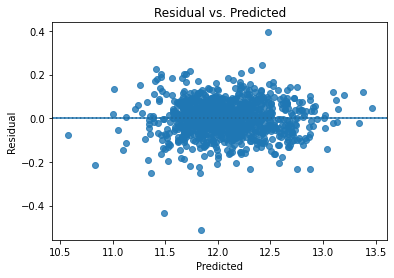

In [134]:
predictions = grid.predict(X_train)
errors = y_train - predictions

print("Mean of the errors in the absenteeism model is: {}".format(np.mean(errors)))

sns.residplot(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Mean of the errors in the absenteeism model is: -0.001678731406820325


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


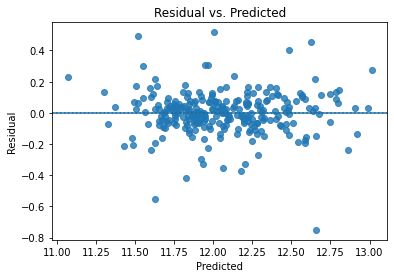

In [135]:
# answer below:

predictions1 = grid.predict(X_test)
errors1 = y_test - predictions1

print("Mean of the errors in the absenteeism model is: {}".format(np.mean(errors1)))

sns.residplot(predictions1, errors1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()